# Problem Sheet 8 - Ridge and Lasso

In the last exercise we looked at subset selection techniques for linear regression models.
These methods used standard linear regression on all (or a subset of) possible models incorporating different numbers of predictors.

In this exercise we consider two common shrinkage techniques for feature selection and model regularization.
These techniques have long been well-established in mathematical optimization, and have received interest for data science due to their ability to shrink the coefficients of a linear model.
This becomes advantageous as it enables one to trade off between variance and bias in our model.

We start this lab by exploring the methods provided in `scikit-learn`.
In the first two problems, we consider the diabetes data set.
The goal of these problems is to understand the two main functions for shrinkage, i.e., `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso`.

## Problem 8.1 - Ridge regression (aka Tikhonov regularization)

**Task**: Execute the following code cell to import the diabetes data set. The command `print(dia.DESCR)`, displays a description of the data set.

In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd
dia = load_diabetes()
df = pd.DataFrame(dia.data, columns=dia.feature_names)

**Solution**:

In [8]:
from sklearn.datasets import load_diabetes
import pandas as pd
dia = load_diabetes()
df = pd.DataFrame(dia.data, columns=dia.feature_names)

print(dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

**Task**: Split your data randomly into a test and training set.
Use the function

    from sklearn.model_selection import train_test_split
    
with `random_state=1`.

Your test set should contain approx. 30\% of the data (*Hint*: Use the appropriate optional parameter).

**Solution**:

In [9]:
from sklearn.model_selection import train_test_split
X = dia.data
y = dia.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

The following cell applies ridge regression for `m` different regularization parameters $\alpha$.
As you know from the lecture, ridge regression adds a penalty term to the RSS term in standard linear regression, i.e., instead of considering the optimization problem

$$ \min_{\beta \in \mathbb{R}^{p+1}} \|y - X \beta\|_2^2 = \min_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n \left( y_i - \sum_{j=0}^p x_{i,j}  \beta_j \right)^2 $$

we solve in **ridge regression** the regularized problem

$$ \min_{\beta \in \mathbb{R}^{p+1}} \|y - X \beta\|_2^2 + \alpha \| \beta \|_2^2 = \min_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n \left( y_i - \sum_{j=0}^p x_{i,j}  \beta_j \right)^2 + \alpha \sum_{j=1}^p \beta_j^2$$

**Task**: The following code fragment performs ridge regression for different values of $\alpha$ and stores the coefficients in an array called `Coeffs`.
Afterwards, the coefficients are plotted for different regression parameters.
If you named your training and test data `X_train, X_test` and `y_train, y_test`, the following code cell should be executable.

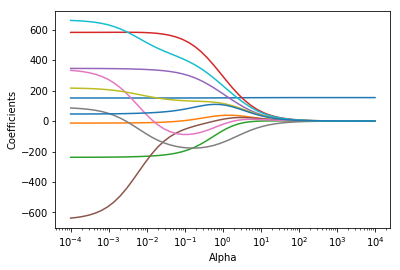

In [10]:
import numpy as np
from sklearn.linear_model import Ridge
%matplotlib inline

# Get dimensions of X_train
n,p = X_train.shape
m = 50
Alpha = np.logspace(-4,4,m)
Coeffs = np.zeros((m,p+1))

for (i,a) in enumerate(Alpha):
    lmr = Ridge(alpha=a)
    lmr.fit(X_train, y_train)
    Coeffs[i,0] = lmr.intercept_
    Coeffs[i,1:] = lmr.coef_
    
# Plot the output
import matplotlib.pyplot as plt
plt.semilogx(Alpha, Coeffs[:,:])
plt.xlabel('Alpha')
plt.ylabel('Coefficients');

## Problem 8.2 - Lasso regression (aka $\ell^1$-regularization)

The **Lasso** is another modification of classical linear regression, and uses the $\ell^1$ norm in the penalization term instead of the $\ell^2$ norm in ridge regression. The optimization problem reads

$$ \min_{\beta \in \mathbb{R}^{p+1}} \|y - X \beta\|_2^2 + \alpha \| \beta \|_1 = \min_{\beta \in \mathbb{R}^{p+1}} \sum_{i=1}^n \left( y_i - \sum_{j=0}^p x_{i,j}  \beta_j \right)^2 + \alpha \sum_{j=1}^p |\beta_j|$$

Both the lasso and the ridge regression lead to (strictly) convex optimization problems, that are problems with a unique solution.
This is true even in the case of $p > n$, while classical linear regression does not possess a unique solution.
While the coefficients in ridge regression decrease in absolute value in general as the penalty parameter $\alpha$ increases, they will never be exactly zero.
In contrast to this, the coefficients in the lasso can become zero, when their influence becomes negligible.

**Task**: Copy the code used for illustrating the influence of the penalty parameter in ridge regression and modify or expand the code to plot the coefficients obtained by the **Lasso** instead.

**Solution**:

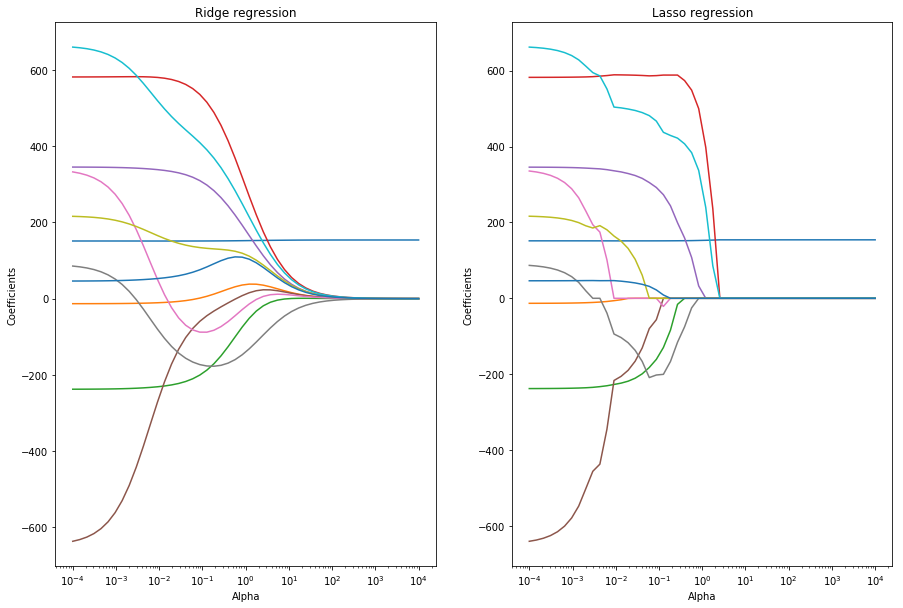

In [11]:
import numpy as np
from sklearn.linear_model import Lasso

# Get dimensions of X_train
n,p = X_train.shape
m = 50
Alpha = np.logspace(-4,4,m)
Coeffs_Ridge = np.zeros((m,p+1))
Coeffs_Lasso = np.zeros((m,p+1))

for (i,a) in enumerate(Alpha):
    lmr = Ridge(alpha=a)
    lmr.fit(X_train, y_train)
    Coeffs_Ridge[i,0] = lmr.intercept_
    Coeffs_Ridge[i,1:] = lmr.coef_
    
    lml = Lasso(alpha=a)
    lml.fit(X_train, y_train)
    Coeffs_Lasso[i,0] = lml.intercept_
    Coeffs_Lasso[i,1:] = lml.coef_
    
# Plot the output
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
fig, ax = plt.subplots(1,2)
ax[0].semilogx(Alpha, Coeffs_Ridge[:,:])
ax[0].set_title('Ridge regression')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Coefficients');

ax[1].semilogx(Alpha, Coeffs_Lasso[:,:])
ax[1].set_title('Lasso regression')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Coefficients');

## Problem 8.3 Is scaling always important?
In this problem, we consider a new data set.
The data set consists of 1499 samples of a particular red wine from Minho, Portugal, called *Vinho verde*.
The first 11 columns in the csv file contain different measurements, the last column contains an expert rating of the quality.
This set became popular in a kaggle competition, but is also publicly available [here](http://www3.dsi.uminho.pt/pcortez/wine/).
The data set resides also on our [webpage](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2018/).

**Task**: Download the new csv-files from the lecture's webpage.
The following code cell imports the csv-file `wine-train.csv` (adjust the path if necessary).
Have a short look at the data set.

In [12]:
import pandas as pd

df = pd.read_csv('./datasets/wine-train.csv', sep=";")
X = df.loc[:, df.columns != 'quality'].values
y = df['quality'].values

Now we want to look at the coefficient selection for both the scaled and unscaled case.
In this example, *scaled* means that we shift the mean of the features to *zero* and scale the standard deviation to *one*.
This can be easily done by the `scale`-function from `sklearn.preprocessing`.

**Task**: Normalize your predictor matrix `X` using the function `scale` and store the scaled matrix as `Xscaled`.
You can check this using the methods `mean(axis=0)` and `std(axis=0)` of a numpy array.

**Solution**:

In [13]:
from sklearn.preprocessing import scale
Xscaled = scale(X)
print('mean of X: ', X.mean(axis=0))
print('\nstd of X:', X.std(axis=0))
print('\nscaled mean: ', Xscaled.mean(axis=0))
print('\nscaled std:', Xscaled.std(axis=0))

mean of X:  [ 8.57738654  0.51900235  0.2892723   2.56220657  0.08887011 15.4600939
 46.79733959  0.99697243  3.29981221  0.66388106 10.40023474]

std of X: [1.76928154e+00 1.77873795e-01 1.96487989e-01 1.31190963e+00
 4.79075502e-02 1.03184606e+01 3.35754413e+01 1.89304730e-03
 1.55134741e-01 1.74043664e-01 1.09567721e+00]

scaled mean:  [ 2.11272488e-16  1.50114662e-16  1.22315651e-16  3.89186162e-17
  1.27875453e-16 -8.06171336e-17  1.11196046e-16  1.54340112e-14
  1.30099374e-15 -4.67023394e-16 -3.11348930e-16]

scaled std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


We want to compare the coefficients obtained for the scaled and unscaled predictors.

**Task**: When done correctly, you should be able to execute the following code.
It computes the *Lasso* estimates for `m` different values of the regularization parameter $\alpha$ and stores the coefficients as well as the cross-validation score for each $\alpha$.
Finally, it plots the coefficients in the upper part of the figure, and the corresponding cv-scores in the lower part.

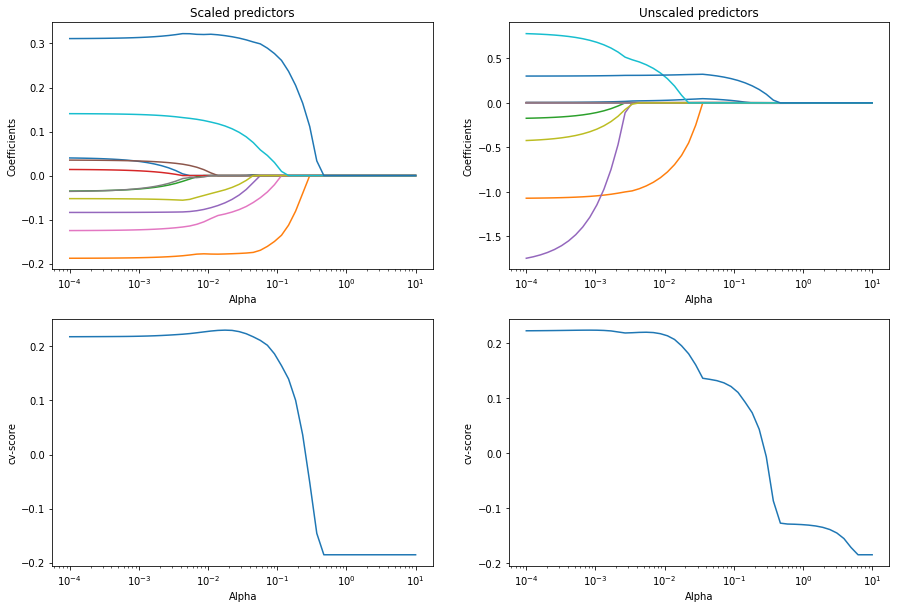

In [14]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

# Get dimensions of X
n,p = X.shape
m = 50
Alpha = np.logspace(-4,1,m)

cscaled = np.zeros((m,p+1))
corig = np.zeros((m,p+1))
cvscaled = np.zeros((m,))
cvorig = np.zeros((m,))

for (i,a) in enumerate(Alpha):
    lm = Lasso(alpha=a,tol=1e-8)
    
    lm.fit(Xscaled, y)
    cscaled[i,0] = lm.intercept_
    cscaled[i,1:] = lm.coef_
    
    cvscaled[i] = cross_val_score(lm, Xscaled, y, cv=10).mean()
    
    
    lm = Lasso(alpha=a,tol=1e-8)
    lm.fit(X, y)
    corig[i,0] = lm.intercept_
    corig[i,1:] = lm.coef_
    
    cvorig[i] = cross_val_score(lm, X, y, cv=10).mean()
    
# Plot the output
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
fig, ax = plt.subplots(2,2)
ax[0][0].semilogx(Alpha, cscaled[:,1:])
ax[0][0].set_title('Scaled predictors')
ax[0][0].set_xlabel('Alpha')
ax[0][0].set_ylabel('Coefficients');

ax[0][1].semilogx(Alpha, corig[:,1:])
ax[0][1].set_title('Unscaled predictors')
ax[0][1].set_xlabel('Alpha')
ax[0][1].set_ylabel('Coefficients');

ax[1][0].semilogx(Alpha, cvscaled)
ax[1][0].set_xlabel('Alpha')
ax[1][0].set_ylabel('cv-score');
ax[1][1].semilogx(Alpha, cvorig);
ax[1][1].set_xlabel('Alpha')
ax[1][1].set_ylabel('cv-score');

**Task**: What do you observe?

**Observation**:

**Solution**:

**Observation**:
- the ranges of the coefficients differ by a magnitude of 10
- in the unscaled model, some predictors don't enter the model even for the smallest regularization parameter
- the order of variables entering/leaving the model differ

**Task**:
Compute the values of $\alpha$, for which the cv-scores are maximized.

**Solution**:

In [20]:
alphascaled = Alpha[cvscaled.argmax()]
alphaorig = Alpha[cvorig.argmax()]
print('Alpha orig:', alphaorig)
print('Alpha scaled:', alphascaled)

Alpha orig: 0.0008286427728546842
Alpha scaled: 0.01757510624854793


**Task**: Now we want to compare the mean squared errors for both regressions using the value of $\alpha$ which maximizes the cv-score.
What do you observe?

**Observation**:

**Solution**:

In [21]:
lmorig = Lasso(alpha=alphaorig,tol=1e-8)
lmorig.fit(X,y)
yhat = lmorig.predict(X)
print('MSE orig: ', (np.power(y-yhat,2)).mean())

lmscaled = Lasso(alpha=alphascaled,tol=1e-8)
lmscaled.fit(Xscaled,y)
yhat = lmscaled.predict(Xscaled)
print('MSE scaled: ', (np.power(y-yhat,2)).mean())

MSE orig:  0.4161264558967955
MSE scaled:  0.41860838196477046


**Observation**: In this case, the scaling does not improve the mean squared error on the training data.

You should observe, that the mean squared errors are very close. Indeed, the MSE for the unscaled problem is even slightly lower than the MSE of the scaled problem.

**Task**: Import now the csv-file `wine-test.csv` and store the predictors as a numpy array `Xtest` and the target variables as `ytest`.

**Solution**:

In [22]:
dftest = pd.read_csv('./datasets/wine-test.csv', sep=";")
Xtest = dftest.loc[:, dftest.columns != 'quality'].values
ytest = dftest['quality'].values

**Task**: Compute the mean squared errors on the test set using the Lasso models from above for the scaled and unscaled version. Don't forget to scale the predictors for your scaled model.

**Solution**:

In [18]:
print('Test error on orig set:\n\t ', (np.power(ytest-lmorig.predict(Xtest),2)).mean())
print('Test error on scaled set:\n\t ', (np.power(ytest-lmscaled.predict(scale(Xtest)),2)).mean())

# If we use the same scaling as for the training data, we can improve these estimates
# This would also be the better way in terms of data snooping bias.
# The implementation is as follows:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
stdScaler.fit(X)
Xnew = stdScaler.transform(Xtest)
print('Test error on scaled set (training scaling):\n\t ', (np.power(ytest-lmscaled.predict(Xnew),2)).mean())

Test error on orig set:
	  0.4355191921680158
Test error on scaled set:
	  0.4523824992704775
Test error on scaled set (training scaling):
	  0.4395328212927196


**Task**: Interpret the results. What could be the reason, why the unscaled model behaves better than the scaled model? Are your predictions good or bad?

**Solution**: We first look at the coefficients in the scaled and unscaled model:

In [13]:
print(lmorig.coef_)
print(lmscaled.coef_)

[ 8.23858884e-03 -1.05070651e+00 -1.22879625e-01  9.23374676e-04
 -1.28507323e+00  3.65129095e-03 -3.73046065e-03 -0.00000000e+00
 -3.24482101e-01  7.03484515e-01  3.03838588e-01]
[ 0.         -0.17807427 -0.          0.         -0.06188803  0.
 -0.08724688 -0.         -0.03232754  0.11259326  0.31776127]


We observe that the scaled model sets more coefficients to zero than the unscaled one. Thus, it could be better interpretable.

Next, we have a look at the scatter matrix and observe very small linear relationships between the data.

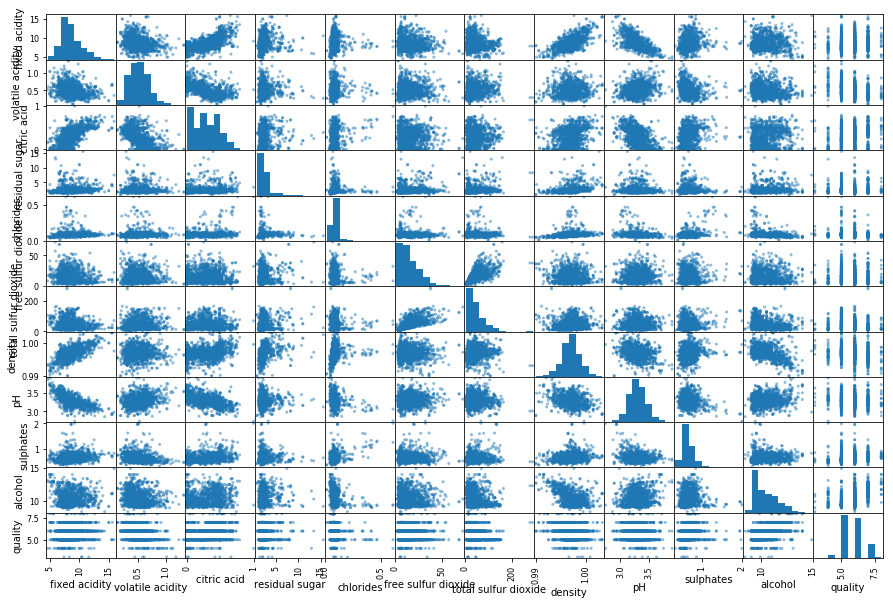

In [14]:
pd.plotting.scatter_matrix(df);

A look at the summary/description of the data set also reveals a high concentration on wines of medium quality. There are no very bad or very good wines in the data set (the range is from quality 3 - 8).

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,8.577387,0.519002,0.289272,2.562207,0.088870,15.460094,46.797340,0.996972,3.299812,0.663881,10.400235,5.663537
std,1.769974,0.177943,0.196565,1.312423,0.047926,10.322500,33.588585,0.001894,0.155195,0.174112,1.096106,0.812645
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,21.000000,0.995900,3.200000,0.560000,9.500000,5.000000
50%,8.200000,0.500000,0.280000,2.200000,0.080000,13.000000,38.000000,0.997000,3.300000,0.620000,10.100000,6.000000
75%,9.600000,0.630000,0.450000,2.600000,0.092000,21.000000,63.000000,0.998030,3.397500,0.730000,11.100000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


Finally, a look at the scatter matrix who plots the predicted qualities against the true ones reveals that we primarily predict a quality between 5 and 6.5.

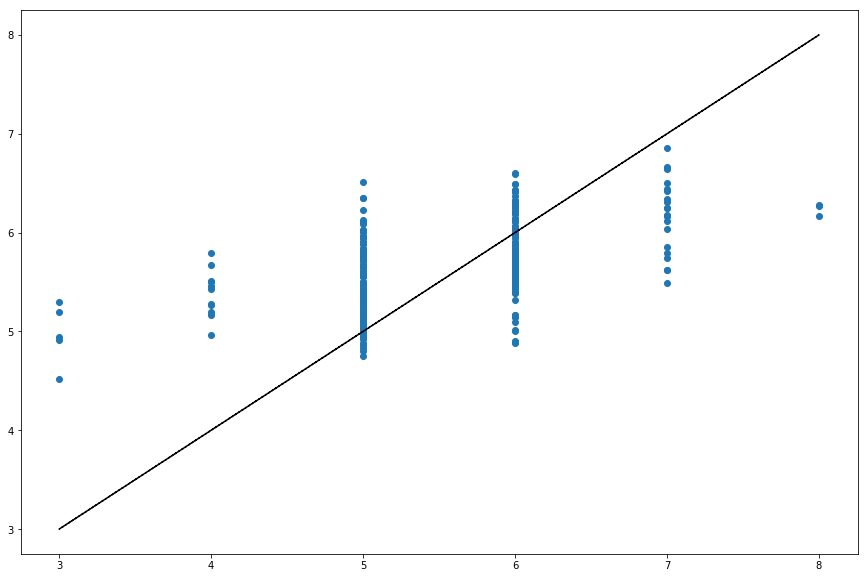

In [17]:
plt.scatter(ytest,lmorig.predict(Xtest))
plt.plot(ytest, ytest,'k--')